## Simulation Generation

This notebook will use FOOOF to generate PSDs with varying aperiodic and periodic parameters in isolation. Settings for data generation can be found in /scripts 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from fooof.synth import *
from fooof import FOOOFGroup, FOOOF

from settings import *

Here we will make several power spectra where only the amplitude of the lower band modulates. All capitalized variables can be found in /BandRatios/bratios/settings.py.

In [8]:
# Settings
FREQ_RANGE = [1,50]
LOW_BAND = [4,8]
HIGH_BAND = [15,25]
APC_DEF = [0,1]

CF_HIGH_DEF = np.mean(HIGH_BAND)
BW_DEF = 1

AMP_START = 0
AMP_END = 1.5
AMP_INC = .1

APC_DEF = [0,1]
APC_START = .25
APC_END = 3
APC_INC = .25

AMP_DEMO = '../dat/AMP_DEMO'
APC_AMP_DEMO = '../dat/APC_AMP_DEMO'

### Simulate PSDs where high-band Amplitude varies

In [9]:
# The Stepper object iterates through a range of values
amp_step = Stepper(AMP_START, AMP_END, AMP_INC)
num_spectra = len(amp_step)

# amp_iter is a generater which returns a set of parameters with the next amp_step value
amp_iter = param_iter( [CF_HIGH_DEF, amp_step, BW_DEF])

# Generates several PSDs 
amp_fs, amp_ps, amp_syns = gen_group_power_spectra( num_spectra, FREQ_RANGE, APC_DEF, amp_iter)

# Aggregate data
amp_data = [amp_fs, amp_ps, amp_syns]

#Save data
np.save(AMP_DEMO, amp_data)

Here are the first and last spectra to show the range of amplitude we are simulating here.

In [10]:
fg = FOOOFGroup(verbose=False)
fg.add_data(amp_fs, amp_ps)
fg.fit()

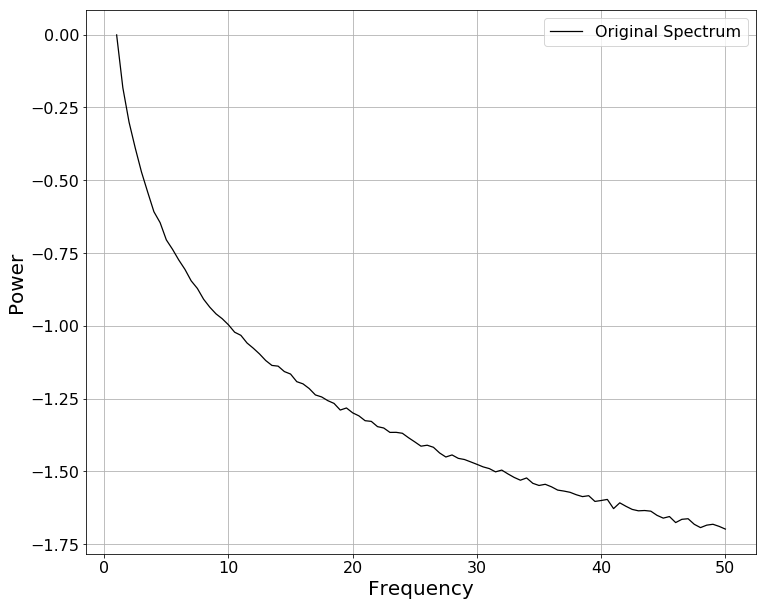

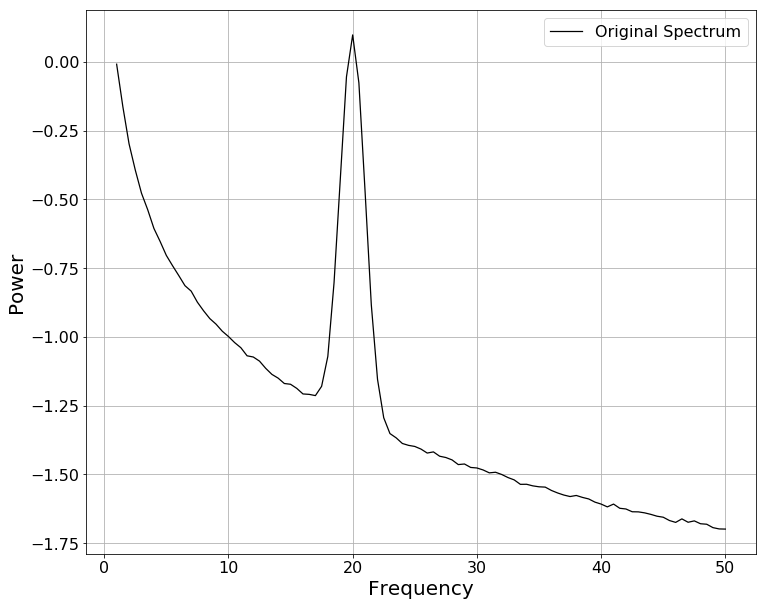

In [11]:
fg.get_fooof(0).plot()
fg.get_fooof(num_spectra-1).plot()

This simulation only varied 1 parameter while keeping all other parameters constant. This next simulation demonstrates when we have two parameters changing at the same time.

## Simulate PSDs where amplitude and aperiodic component vary

This section will generate data where the aperiod component will vary while apmlitude for high band oscillation also varies. The total number of trials will be (number_of_amplitude_changes) * (number_of_aperiodic_changes).

In [12]:
data = []

apc_step = Stepper(APC_START, APC_END, APC_INC)
for apc in apc_step:
        
    # Low band sweeps through amplitude range
    amp_step = Stepper(AMP_START, AMP_END, AMP_INC)
    amp_iter = param_iter( [CF_HIGH_DEF, amp_step, BW_DEF])
    
    # Generates data
    amp_apc_fs, amp_apc_ps, amp_apc_syns = gen_group_power_spectra( len(amp_step), FREQ_RANGE, [0, apc], amp_iter)
    data.append(np.array([apc, amp_apc_fs, amp_apc_ps], dtype=object))

np.save(APC_AMP_DEMO, data)

In [13]:
fm_1 = FOOOF(verbose=False)
fm_1.add_data(data[0][1], data[0][2][0])
fm_1.fit()

fm_2 = FOOOF(verbose=False)
fm_2.add_data(data[0][1], data[-1][2][-1])
fm_2.fit()

Here we plot the power spectrums which have the lowest amplitude and aperiodic values and that with the highest amplitude and aperiodic value. Notice the y-axis to appreciate the range of aperiodic values.

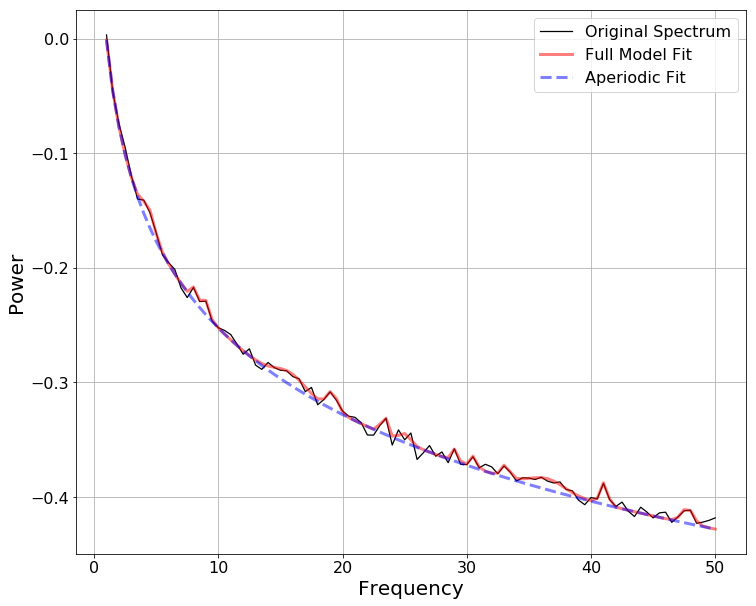

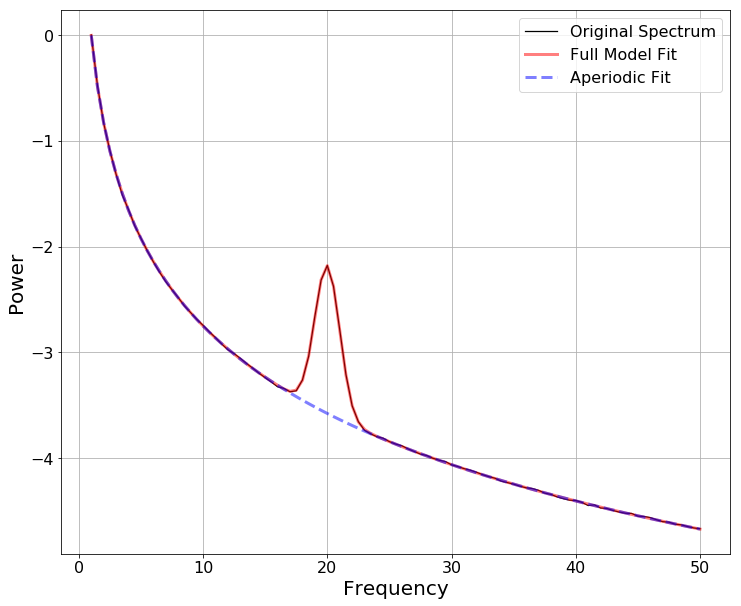

In [14]:
fm_1.plot()
fm_2.plot()